# Module 6: Classification

Makine öğrenimi, veri analitiği ve yapay zeka projelerinde en yaygın kullanılan yöntemlerden biri sınıflandırmadır.

Bu tutorial, bir .csv formatındaki veri seti kullanarak lojistik regresyon, destek vektör makineleri (SVM), k-en yakın komşu (KNN) ve Multilayer Perceptron (MLP) gibi popüler sınıflandırma algoritmalarını adım adım incelemenizi sağlar. Hem teorik temel hem de uygulamalı kod örnekleriyle zenginleştirilmiş bu rehber, veri hazırlama süreçlerinden başlayarak model değerlendirme ve performans analizine kadar tüm aşamaları kapsar.

Amacımız, sınıflandırma algoritmalarının gerçek veri setleri üzerinde nasıl kullanılacağını öğretirken, bu modellerin avantajlarını ve uygulama alanlarını anlamanızı sağlamaktır.

## 6.1 Heart Disease Dataset (Kaggle)

Bu tutorial kapsamında Kaggle üzerinden erişime açık olan **Heart Disease Dataset** kullanılacaktır. Bu veri seti, hastaların verilen bilgilerine göre kalp hastası olup olmadığına dair sınıflandırma yapmak için kullanılmaktadır. Veri setine aşağıdaki linkten ulaşabilirsiniz:

https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

Veri setinde toplam 1025 kayıt ve 14 sütun bulunmaktadır.

"target" sütunu hastada hastalık olup olmadığını ifade eder. Burada 0 "hasta değil", 1 ise "hasta" demektir.

Aşağıdaki kod parçası, veri setinin tanımlanmasını sağlar ve veri setini yazdırır.

In [1]:
import pandas as pd
# Specify the file path
file_path = 'C:/Users/DELL/Documents/PythonLab/heart.csv'

# Read the CSV file into a pandas DataFrame
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify it's loaded correctly
print(data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


## 3.2 Karar Ağacı (Decision Tree Classifier)

Bu bölümde, önceki alt bölümde açıklanan kalp hastalığı veri setine bir karar ağacı sınıflandırıcısı uyguluyoruz.

Bu bölüm, modeli oluşturmak, eğitmek ve değerlendirmek için gerekli kütüphaneleri içe aktarır:

* `train_test_split`: Veri setini eğitim ve test olarak bölmek için
* `DecisionTreeClassifier`: Karar ağacı modeli oluşturmak için.
* `accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix`: Modelin performansını değerlendirmek için.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

Karar ağacının kullanılabilmesi için öncelikle veri setini tahmin edici (X) ve hedef (y) değişkenleri ayırmak gerekir.
* `X`: Hedef değişken (sınıf etiketi) dışındaki tüm sütunları içerir.
* `y`: Hedef değişken olan "target" sütununu temsil eder (0 veya 1).

In [3]:
y = data['target']
X = data.drop(['target'],axis=1)

Veri seti, %80 eğitim (training) ve %20 test (test) verisi olarak bölünür.
* random_state: Aynı sonuçları elde etmek için rastgele ayrımı sabitler.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Verilerin hazırlanması sonrası karar ağacı modeli oluşturulur ve model eğitilir. Burada karar ağaında oluşacak ağaçların maksimum derinliği 3 olacak şekilde sınırlandırılmıştır. Bu değer, eldeki veri setine göre değişiklik gösterebilir.

* clf_dt: Karar ağacı sınıflandırıcı modelidir.
* fit: Modeli, eğitim verisi (X_train, y_train) kullanarak eğitir.

In [5]:
from sklearn.model_selection import GridSearchCV

clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt.fit(X_train, y_train)

param_grid = {
    'criterion': ['gini', 'entropy'],                # Split criterion
    'max_depth': [None, 10, 20, 30, 40],             # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],                 # Minimum number of samples needed to split an internal node
    'min_samples_leaf': [1, 2, 4],                   # Minimum number of samples needed to be at a leaf node
    'max_features': [None, 'sqrt', 'log2'],          # Number of features to consider for the best split
    'splitter': ['best', 'random']                   # Splitter strategy
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=clf_dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best parameters found: ", grid_search.best_params_)

# Make predictions using the best model
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)



Fitting 5 folds for each of 540 candidates, totalling 2700 fits
Best parameters found:  {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}


Sınıflandırma sonrası model performansını değerlendirmek için accuracy, precision, recall, F1-score gibi metrikler kullanılabilir.
* `accuracy_score`: Modelin doğruluğunu hesaplar (tüm doğru tahminlerin yüzdesi).
* `confusion_matrix`: Doğru ve yanlış sınıflandırmaların sayısını gösterir.
* `classification_report`: Precision, Recall, F1-Score gibi metriklerin detaylarını verir.

Accuracy: 0.9853658536585366
Precision Score: 1.0
Recall Score: 0.970873786407767
F1 Score: 0.9852216748768473
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



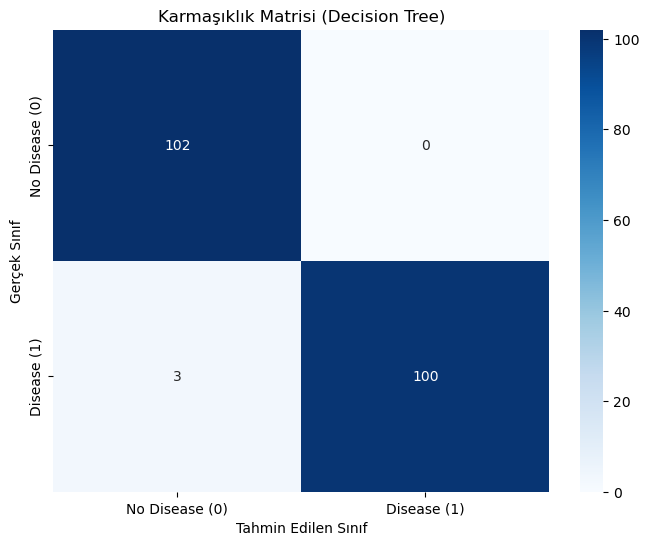

In [6]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Karmaşıklık matrisini oluşturma
cm = confusion_matrix(y_test, y_pred)

# Karmaşıklık matrisini görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease (0)", "Disease (1)"], yticklabels=["No Disease (0)", "Disease (1)"])
plt.xlabel("Tahmin Edilen Sınıf")
plt.ylabel("Gerçek Sınıf")
plt.title("Karmaşıklık Matrisi (Decision Tree)")
plt.show()

Sınıflandırıcıyı eğittikten sonra elde edilen karar ağacını çizebiliriz. Bunu yapmak için öncelikle hem graphviz (http://www.graphviz.org) hem de onun pydotplus (http://pydotplus.readthedocs.io/) adlı Python arayüzünü kurmalısınız.

In [7]:
#!pip install pydotplus


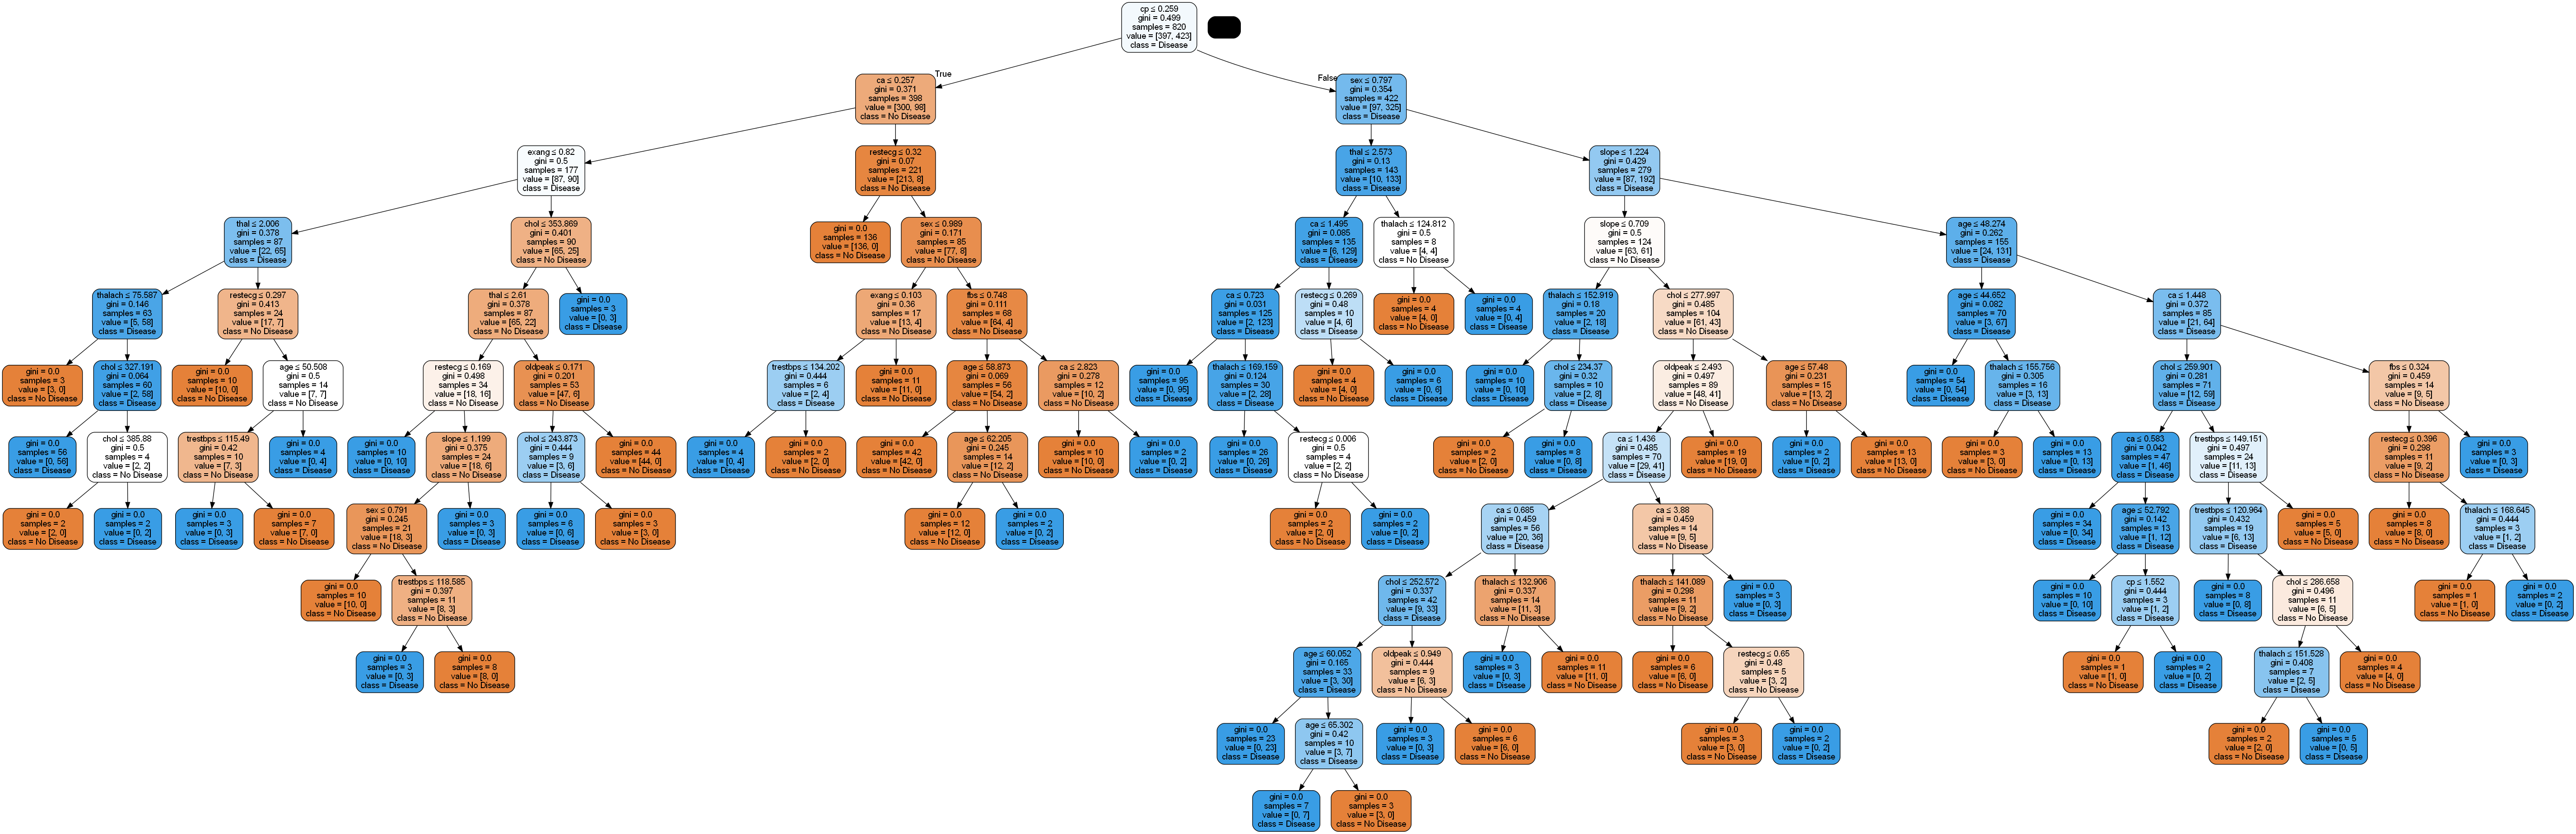

In [7]:
import pydotplus
from IPython.display import Image
from sklearn.tree import plot_tree, export_graphviz

# Karar Ağacını Görselleştirme (pydotplus ve Image ile)
dot_data = export_graphviz(best_dt, out_file=None, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

matplotlib kütüphanesi de görselleştirme için sıklıkla kullanılmaktadır.

* plot_tree: Karar ağacını görselleştirir.
* feature_names: Ağaçta kullanılan özelliklerin isimleri.
* class_names: Sınıf isimleri (Hastalık yok / Hastalık var).
* filled: Düğümlerin renklerini tahmin doğruluğuna göre doldurur.
* plt.show(): Ağaç yapısını ekranda gösterir.

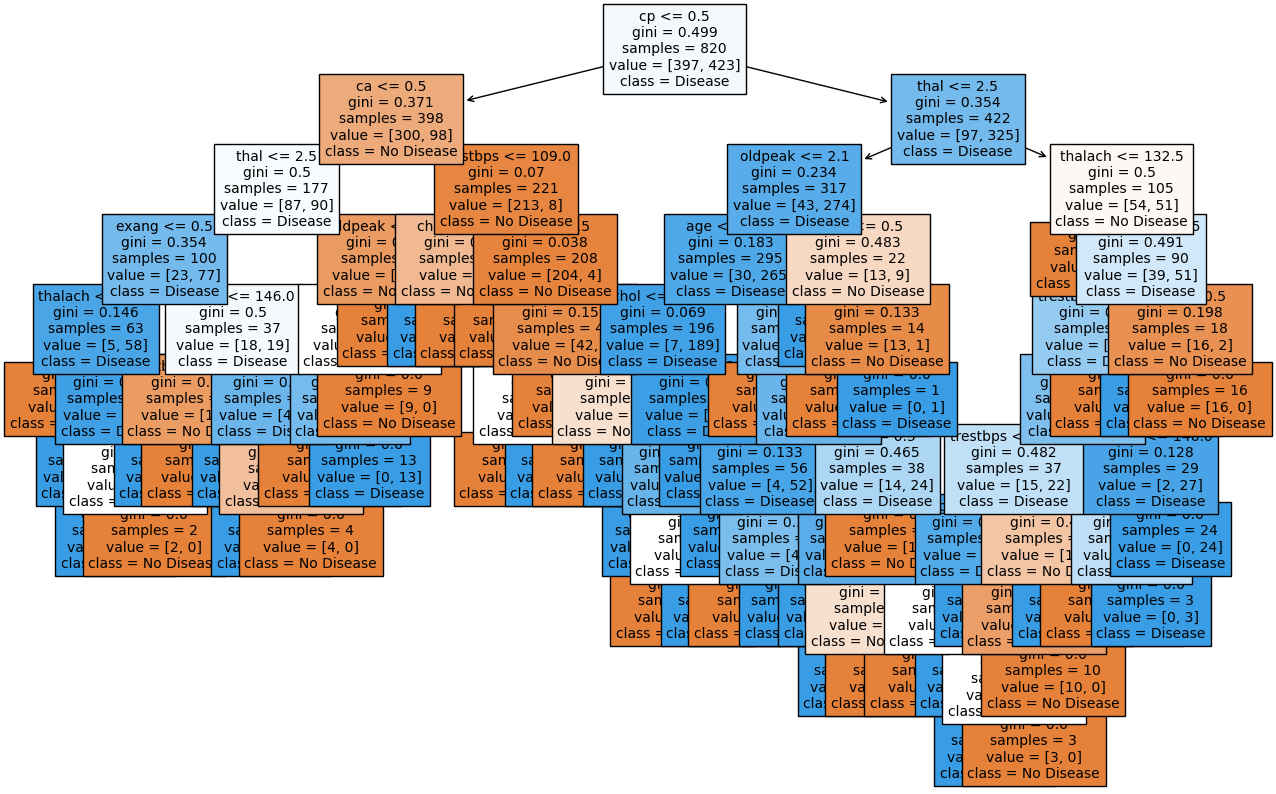

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plot_tree(clf_dt, feature_names=X.columns.tolist(), class_names=['No Disease', 'Disease'], filled=True, fontsize=10)
plt.show()

Karar ağacının maksimum derinliğine göre accuracy skorunun değişimini görelim:

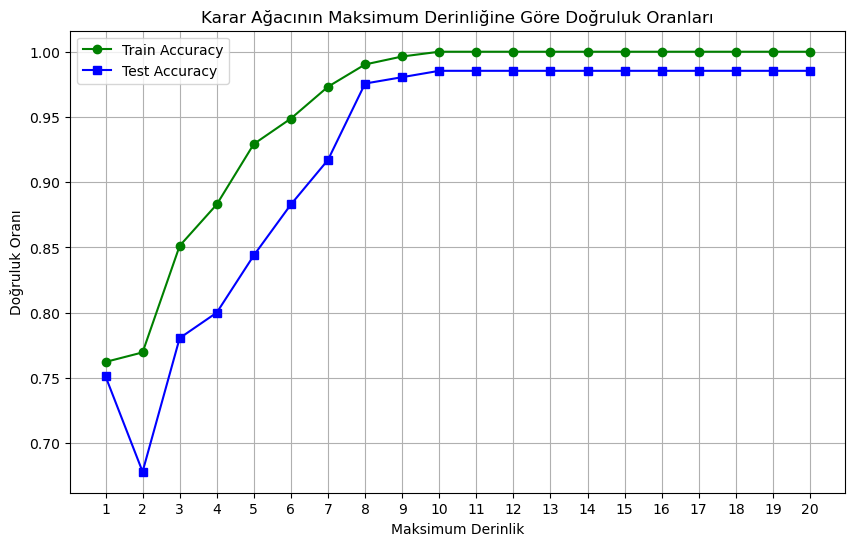

In [9]:
# Farklı derinlikler için doğruluk oranlarını saklamak
train_accuracies = []
test_accuracies = []
max_depths = range(1, 21)  # Maksimum derinlik 1'den 20'ye kadar

# Her derinlik için karar ağacı modeli çalıştırma
for depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)  # Modeli eğitme

    # Eğitim ve test doğruluk oranlarını hesaplama
    train_accuracies.append(clf.score(X_train, y_train))
    test_accuracies.append(clf.score(X_test, y_test))

# Derinliğe göre doğruluk oranlarını görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_accuracies, marker='o', label="Train Accuracy", linestyle='-', color='green')
plt.plot(max_depths, test_accuracies, marker='s', label="Test Accuracy", linestyle='-', color='blue')
plt.xticks(max_depths)
plt.xlabel("Maksimum Derinlik")
plt.ylabel("Doğruluk Oranı")
plt.title("Karar Ağacının Maksimum Derinliğine Göre Doğruluk Oranları")
plt.legend()
plt.grid(True)
plt.show()

## 3.3 Model Overfitting



 Bu örnekte Overfitting sorununu görselleştirebilmek için daha önce ayırdığımız eğitim ve test verilerini farklı maksimum derinliklerde (2 ila 50) karar ağaçlarını eğitmek için kullanıyoruz. Ardından her maksimum derinlik için elde edilen accuracy skorlarını grafikle görselleştiriyoruz.

Text(0, 0.5, 'Accuracy')

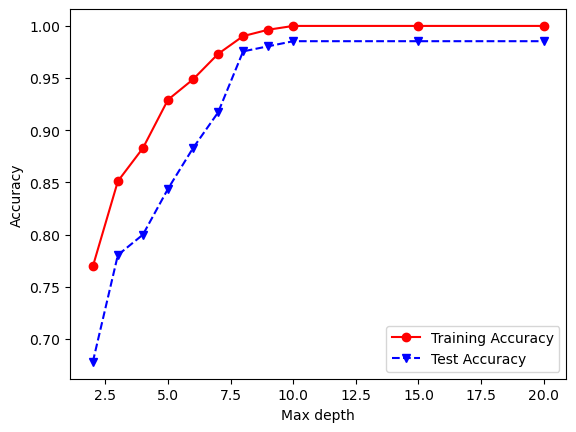

In [10]:
import numpy as np

maxdepths = [2,3,4,5,6,7,8,9,10,15,20]

trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(y_train, Y_predTrain)
    testAcc[index] = accuracy_score(y_test, Y_predTest)
    index += 1

# Plot of training and test accuracies

plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

Yukarıdaki grafik, ağacın maksimum derinliği arttıkça (yani model daha karmaşık hale geldikçe) eğitim doğruluğunun iyileşmeye devam edeceğini göstermektedir.

## 3.4 Alternatif Sınıflandırma Teknikleri

Python sklearn kütüphanesi karar ağacı sınıflandırıcısının yanı sıra diğer sınıflandırma tekniklerini de desteklemektedir. Bu bölümde,
* K-Nearest neighbor classifier (KNN),
* Doğrusal sınıflandırıcıların (lojistik regresyon ve destek vektör makinesi (SVM))
* Topluluk (ensemble) yöntemlerinin (boosting, bagging ve rastgele orman (RF)) ve
* Multi-layer Perceptron (MLP) yönteminin önceki bölümde verilen  verilere nasıl uygulanacağını göstermek için örnekler bulunmaktadır.

### 3.4.1 K-Nearest neighbor classifier

Bu yaklaşımda, bir test örneğinin sınıf etiketi, *k* en yakın eğitim örneklerinin çoğunluk sınıfına göre tahmin edilir. En yakın komşuların sayısı, *k*, mesafe metriği ile birlikte kullanıcı tarafından sağlanması gereken bir hiperparametredir. Yakınlık hesabı için varsayılan olarak Öklid mesafesini kullanılabilir (Öklid mesafesi burada p=2'ye eşit bir üs faktörü ile Minkowski mesafesine eşdeğerdir):

\begin{equation*}
\textrm{Minkowski distance}(x,y) = \bigg[\sum_{i=1}^N |x_i-y_i|^p \bigg]^{\frac{1}{p}}
\end{equation*}

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# KNN modelini tanımlama ve eğitme
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Parametre tanımları
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],              # Number of neighbors
    'weights': ['uniform', 'distance'],           # Weight function used in prediction
    'metric': ['euclidean', 'manhattan'],         # Distance metric to use
    'p': [1, 2]                                  # Power parameter for Minkowski distance
}

# GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)

# Optimum model
best_knn = grid_search.best_estimator_

# Test verisi üzerinde tahmin yapma
y_pred = best_knn.predict(X_test)


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best parameters found:  {'metric': 'manhattan', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


Accuracy: 0.9854
F1 Score: 0.9852
Precision: 1.0000
Recall: 0.9709

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



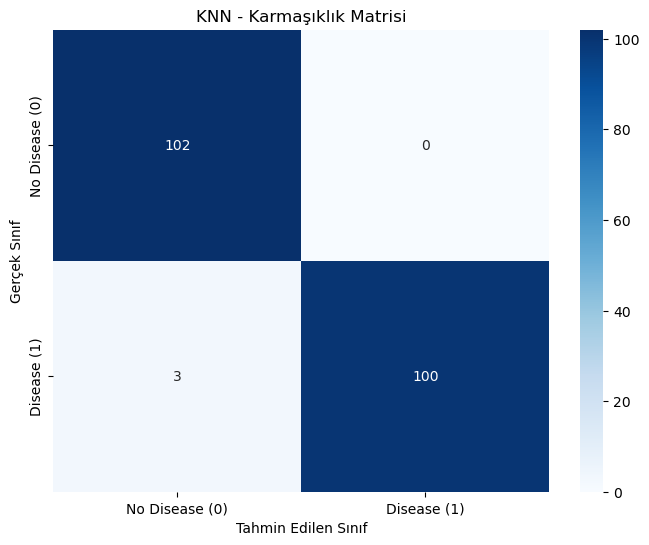

In [12]:
# Modeli değerlendirme
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Karmaşıklık matrisini oluşturma
cm_knn = confusion_matrix(y_test, y_pred)

# Karmaşıklık matrisini görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease (0)", "Disease (1)"], yticklabels=["No Disease (0)", "Disease (1)"])
plt.xlabel("Tahmin Edilen Sınıf")
plt.ylabel("Gerçek Sınıf")
plt.title("KNN - Karmaşıklık Matrisi")
plt.show()

### Verilerde Standartlaştırma:

Standardizasyon, veri setindeki özellikleri aynı ölçeğe getirmek için her bir özelliğin ortalamasını 0, standart sapmasını 1 olacak şekilde dönüştürme işlemidir. Farklı ölçüm birimlerine sahip değişkenleri dengeleyerek, özellikle KNN, SVM, lojistik regresyon gibi mesafeye dayalı veya gradient tabanlı algoritmaların performansını artırır. Ayrıca, optimizasyon süreçlerini hızlandırır ve modelin genelleme kabiliyetini geliştirir. Ancak, kategorik veriler veya ölçekten etkilenmeyen algoritmalar (ör. karar ağaçları) için gerekli değildir. Bu işlem, özellikler arasında adil bir kıyaslama yaparak modelin doğruluk ve öğrenme hızını iyileştirir.

Modellere göre standardizasyon ihtiyaçlarına bakalım:
* Karar Ağacı (Decision Tree):
Karar ağaçları, yalnızca özelliklerin sıralamasına dayanır ve mesafe veya gradient descent kullanmaz. Bu nedenle, özelliklerin ölçeklenmesi modelin performansını etkilemez.
* KNN (K-Nearest Neighbors):
KNN mesafe hesaplamasına dayanır (ör. Euclidean mesafesi), bu nedenle farklı ölçeklerdeki değişkenler modelin performansını olumsuz etkileyebilir ve standardizasyona ihtiyaç duyar.
* SVM (Support Vector Machines):
Özellikle RBF (Radial Basis Function) veya polinomsal çekirdek gibi çekirdekler kullanıldığında, özelliklerin ölçeklenmesi modelin performansı ve yakınsaması için kritiktir. Farklı ölçeklerdeki özellikler, hiperdüzlemin yanlış yerleştirilmesine neden olabilir. Bu nedenle standardizasyona ihtiyaç duyar.
* Lojistik Regresyon:
Gradient descent tabanlı optimizasyon kullandığı için farklı ölçeklerdeki özellikler modelin öğrenme sürecini yavaşlatabilir ve yanlış tahminlere yol açabilir. Bu nedenle standardizasyona ihtiyaç duyar.
* MLP (Multilayer Perceptron):
Gradient descent tabanlı olduğu için, özelliklerin farklı ölçeklerde olması optimizasyonu zorlaştırır ve modelin yakınsama süresini uzatabilir. Bu nedenle standardizasyona ihtiyaç duyar.


Verilere standartlaştırma uygulayarak sınıflandırma performansını artırabiliriz:

Komşu sayısının (k) değişimine göre modelin başarısının değişimini aşağıdaki kod parçası ile görebiliriz.

### 3.4.2 Doğrusal Sınıflandırıcılar

Lojistik regresyon ve destek vektör makinesi (SVM) gibi doğrusal sınıflandırıcılar, örnekleri farklı sınıflardan ayırmak için doğrusal bir ayırıcı hiper düzlem oluşturur.

Lojistik regresyon için model aşağıdaki denklemle tanımlanabilir:
\begin{equation*}
P(y=1|x) = \frac{1}{1 + \exp^{-w^Tx - b}} = \sigma(w^Tx + b)
\end{equation*}
Model parametreleri (w,b) aşağıdaki düzenlenmiş fonksiyonun optimizasyonu ile tahmin edilir:
\begin{equation*}
(w^*,b^*) = \arg\min_{w,b} - \sum_{i=1}^N y_i \log\bigg[\sigma(w^Tx_i + b)\bigg] + (1-y_i) \log\bigg[\sigma(-w^Tx_i - b)\bigg] + \frac{1}{C} \Omega([w,b])
\end{equation*}
Burada $C$ model karmaşıklığının tersini kontrol eden bir hiperparametredir (daha küçük değerler daha güçlü düzenleme anlamına gelir). $\Omega(\cdot)$ ise  bir l2-normu olduğu varsayılan düzenleme terimidir.

Destek vektör makinesi için, model parametreleri $(w^*,b^*)$ aşağıdaki kısıtlı optimizasyon problemi çözülerek tahmin edilir:
\begin{eqnarray*}
&&\min_{w^*,b^*,\{\xi_i\}} \frac{\|w\|^2}{2} + \frac{1}{C} \sum_i \xi_i \\
\textrm{s.t.} && \forall i: y_i\bigg[w^T \phi(x_i) + b\bigg] \ge 1 - \xi_i, \ \ \xi_i \ge 0  
\end{eqnarray*}

SVM Model Evaluation:
Accuracy: 0.8195
F1 Score: 0.8171
Precision: 0.8363
Recall: 0.8195

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.71      0.80       102
           1       0.76      0.93      0.84       103

    accuracy                           0.82       205
   macro avg       0.84      0.82      0.82       205
weighted avg       0.84      0.82      0.82       205



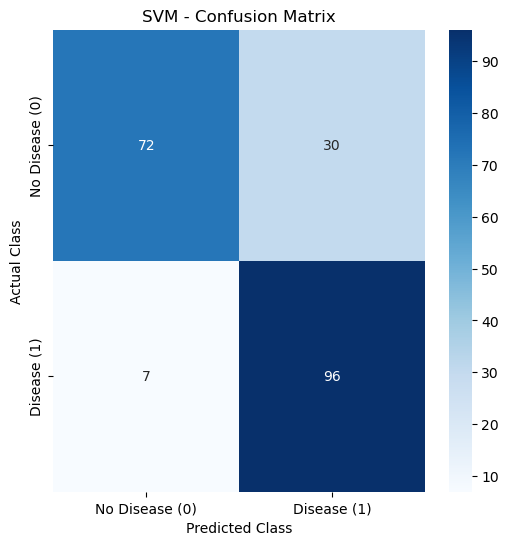

In [13]:
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

# Özellikleri standartlaştırma
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVM Modeli
svm_model = SVC(kernel="linear", C=0.1, random_state=42)
svm_model.fit(X_train_scaled, y_train)  # Model eğitimi
y_pred_svm = svm_model.predict(X_test_scaled)  # Test seti tahminleri

# SVM Modeli Değerlendirme
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm, average="weighted")
svm_precision = precision_score(y_test, y_pred_svm, average="weighted")
svm_recall = recall_score(y_test, y_pred_svm, average="weighted")

print("SVM Model Evaluation:")
print(f"Accuracy: {svm_accuracy:.4f}")
print(f"F1 Score: {svm_f1:.4f}")
print(f"Precision: {svm_precision:.4f}")
print(f"Recall: {svm_recall:.4f}\n")

# SVM Modeli Classification Report
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

# SVM Karmaşıklık Matrisi
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease (0)", "Disease (1)"], yticklabels=["No Disease (0)", "Disease (1)"])
plt.title("SVM - Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

Logistic Regression Model Evaluation:
Accuracy: 0.7902
F1 Score: 0.7883
Precision: 0.8004
Recall: 0.7902

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.70      0.77       102
           1       0.75      0.88      0.81       103

    accuracy                           0.79       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.79      0.79       205



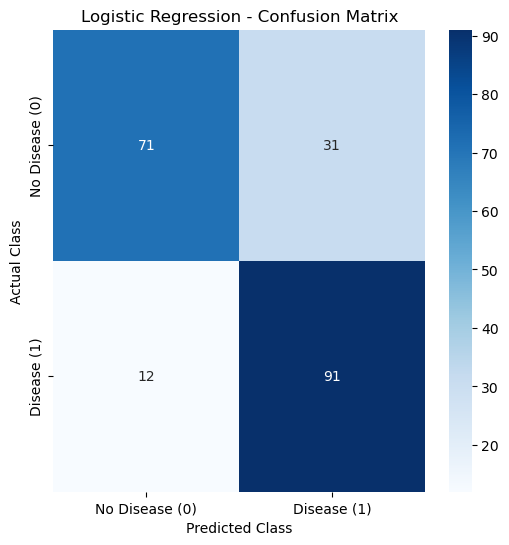

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

# Lojistik Regresyon Modeli
log_reg_model = LogisticRegression(max_iter=1000, C=0.1, random_state=42)
log_reg_model.fit(X_train_scaled, y_train)  # Model eğitimi
y_pred_log_reg = log_reg_model.predict(X_test_scaled)  # Test seti tahminleri

# Lojistik Regresyon Modeli Değerlendirme
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
log_reg_f1 = f1_score(y_test, y_pred_log_reg, average="weighted")
log_reg_precision = precision_score(y_test, y_pred_log_reg, average="weighted")
log_reg_recall = recall_score(y_test, y_pred_log_reg, average="weighted")

print("Logistic Regression Model Evaluation:")
print(f"Accuracy: {log_reg_accuracy:.4f}")
print(f"F1 Score: {log_reg_f1:.4f}")
print(f"Precision: {log_reg_precision:.4f}")
print(f"Recall: {log_reg_recall:.4f}")

# Lojistik Regresyon Modeli Classification Report
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

# Lojistik Regresyon Karmaşıklık Matrisi
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_log_reg, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease (0)", "Disease (1)"], yticklabels=["No Disease (0)", "Disease (1)"])
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

Aşağıdaki kodlar, C parametresinin değişimine göre modellerin başarı değişimini görebileceğimiz bir grafik çizer.

Text(0, 0.5, 'Accuracy')

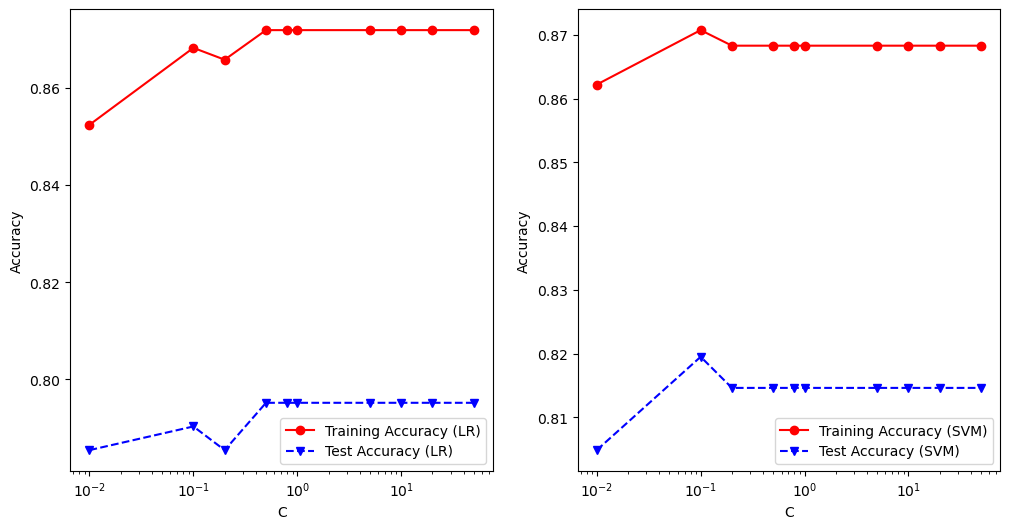

In [15]:
C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]
LRtrainAcc = []
LRtestAcc = []
SVMtrainAcc = []
SVMtestAcc = []

for param in C:
    clf = LogisticRegression(C=param)
    clf.fit(X_train_scaled, y_train)
    Y_predTrain = clf.predict(X_train_scaled)
    Y_predTest = clf.predict(X_test_scaled)
    LRtrainAcc.append(accuracy_score(y_train, Y_predTrain))
    LRtestAcc.append(accuracy_score(y_test, Y_predTest))

    clf = SVC(C=param,kernel='linear')
    clf.fit(X_train_scaled, y_train)
    Y_predTrain = clf.predict(X_train_scaled)
    Y_predTest = clf.predict(X_test_scaled)
    SVMtrainAcc.append(accuracy_score(y_train, Y_predTrain))
    SVMtestAcc.append(accuracy_score(y_test, Y_predTest))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.plot(C, LRtrainAcc, 'ro-', C, LRtestAcc,'bv--')
ax1.legend(['Training Accuracy (LR)','Test Accuracy (LR)'])
ax1.set_xlabel('C')
ax1.set_xscale('log')
ax1.set_ylabel('Accuracy')

ax2.plot(C, SVMtrainAcc, 'ro-', C, SVMtestAcc,'bv--')
ax2.legend(['Training Accuracy (SVM)','Test Accuracy (SVM)'])
ax2.set_xlabel('C')
ax2.set_xscale('log')
ax2.set_ylabel('Accuracy')

Sınıflar arasındaki gerçek karar sınırları, verilen 2 boyutlu veri kümesi için doğrusal olmadığından doğrusal sınıflandırıcıların veriler üzerinde zayıf performans gösterdiğini unutmayın.

### 3.4.3 Nonlinear Support Vector Machine

Aşağıdaki kod, 2 boyutlu veri kümesine uyması için Gauss radyal tabanlı fonksiyon çekirdeği ile doğrusal olmayan destek vektör makinesi kullanımının bir örneğini göstermektedir.

SVM Model Evaluation:
Accuracy: 0.8195
F1 Score: 0.8187
Precision: 0.8246
Recall: 0.8195

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.75      0.81       102
           1       0.78      0.88      0.83       103

    accuracy                           0.82       205
   macro avg       0.82      0.82      0.82       205
weighted avg       0.82      0.82      0.82       205



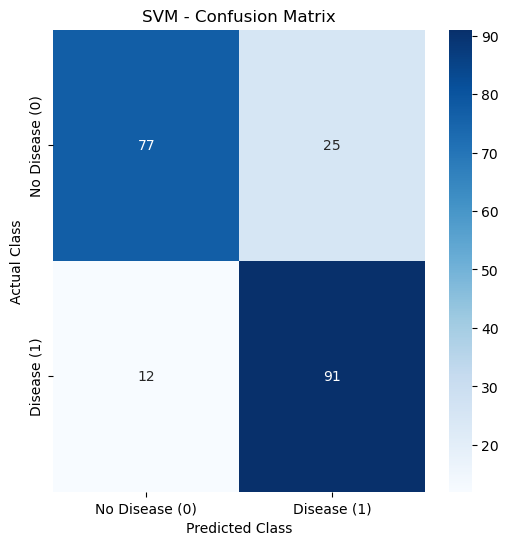

In [16]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

# SVM Modeli
svm_model = SVC(C=0.1,kernel='rbf',gamma='auto')
svm_model.fit(X_train_scaled, y_train)  # Model eğitimi
y_pred_svm = svm_model.predict(X_test_scaled)  # Test seti tahminleri

# SVM Modeli Değerlendirme
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm, average="weighted")
svm_precision = precision_score(y_test, y_pred_svm, average="weighted")
svm_recall = recall_score(y_test, y_pred_svm, average="weighted")

print("SVM Model Evaluation:")
print(f"Accuracy: {svm_accuracy:.4f}")
print(f"F1 Score: {svm_f1:.4f}")
print(f"Precision: {svm_precision:.4f}")
print(f"Recall: {svm_recall:.4f}\n")

# SVM Modeli Classification Report
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

# SVM Karmaşıklık Matrisi
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease (0)", "Disease (1)"], yticklabels=["No Disease (0)", "Disease (1)"])
plt.title("SVM - Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

C parametresinin değişimine göre lineer olmayan SVM'in başarı değişimini görelim:

Text(0, 0.5, 'Accuracy')

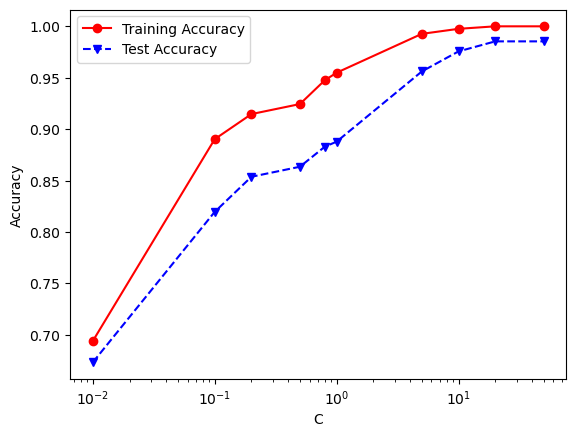

In [17]:
from sklearn.svm import SVC

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]
SVMtrainAcc = []
SVMtestAcc = []

for param in C:
    clf = SVC(C=param,kernel='rbf',gamma='auto')
    clf.fit(X_train_scaled, y_train)
    Y_predTrain = clf.predict(X_train_scaled)
    Y_predTest = clf.predict(X_test_scaled)
    SVMtrainAcc.append(accuracy_score(y_train, Y_predTrain))
    SVMtestAcc.append(accuracy_score(y_test, Y_predTest))

plt.plot(C, SVMtrainAcc, 'ro-', C, SVMtestAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')

Doğrusal olmayan SVM'in doğrusal SVM'e kıyasla daha yüksek bir test doğruluğu elde edebildiği görülebilmektedir.

### 3.4.4 Topluluk (Ensemble) Yöntemleri

Bir topluluk sınıflandırıcı, eğitim verilerinden bir dizi temel sınıflandırıcı oluşturur ve her bir temel sınıflandırıcı tarafından yapılan tahminler üzerinde bir oylama yaparak sınıflandırmayı gerçekleştirir. Bu örnekte 3 tür topluluk sınıflandırıcısını (random Forest, Bagging, AdaBoost) karşılaştırıyoruz. Her bir yöntemin değerlendirme metriklerini yazdırıp karmaşıklık matrislerini çizdiriyoruz. Ardından eğitim (train) ve test doğruluk oranlarını bir çubuk grafik üzerinde görselleştiriyoruz.

Kullanılan modellerin hepsi 500 ağaç ile sınırlandırılmıştır. Random Forest haricindeki modellerin maksimum ağaç derinliği 10 olarak ayarlanmıştır.

Random Forest Model Evaluation:
Accuracy: 0.9854
F1 Score: 0.9854
Precision: 0.9858
Recall: 0.9854



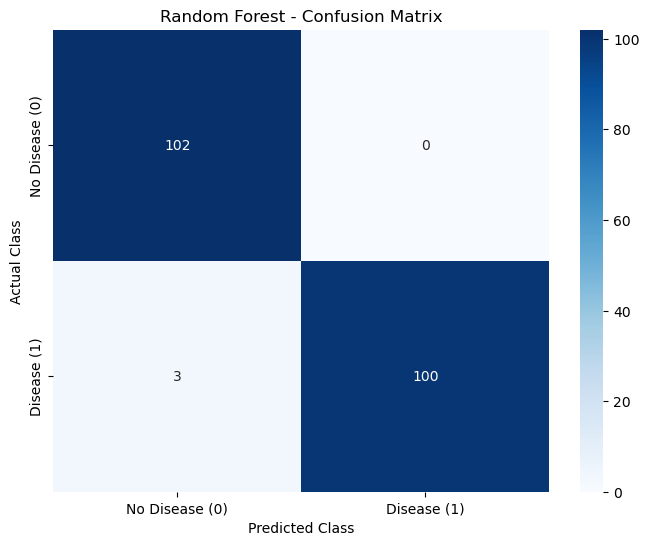

In [18]:
# Modellerin eğitimi ve değerlendirme metriklerinin hesaplanması
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

numBaseClassifiers = 500
maxdepth = 10
trainAcc = []
testAcc = []

# Random Forest
clf = ensemble.RandomForestClassifier(n_estimators=numBaseClassifiers)
clf.fit(X_train_scaled, y_train)
Y_predTrain = clf.predict(X_train_scaled)
Y_predTest = clf.predict(X_test_scaled)
trainAcc.append(accuracy_score(y_train, Y_predTrain))
testAcc.append(accuracy_score(y_test, Y_predTest))

rf_accuracy = accuracy_score(y_test, Y_predTest)
rf_f1 = f1_score(y_test, Y_predTest, average="weighted")
rf_precision = precision_score(y_test, Y_predTest, average="weighted")
rf_recall = recall_score(y_test, Y_predTest, average="weighted")

print("Random Forest Model Evaluation:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"F1 Score: {rf_f1:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}\n")

# Karmaşıklık matrisinin çizdirilmesi
confusion_matrix = confusion_matrix(y_test, Y_predTest)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease (0)", "Disease (1)"], yticklabels=["No Disease (0)", "Disease (1)"])
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

Bagging Classifier Model Evaluation:
Accuracy: 0.9854
F1 Score: 0.9854
Precision: 0.9858
Recall: 0.9854



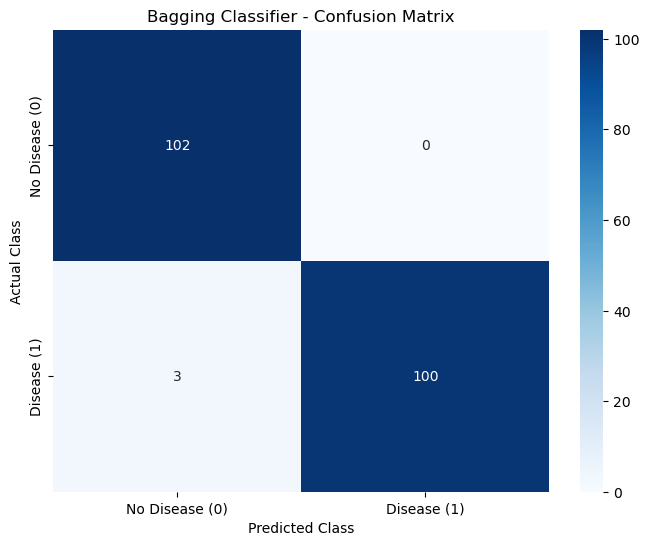

In [19]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

# Bagging Classifier

clf = ensemble.BaggingClassifier(DecisionTreeClassifier(max_depth=maxdepth),n_estimators=numBaseClassifiers)
clf.fit(X_train_scaled, y_train)
Y_predTrain = clf.predict(X_train_scaled)
Y_predTest = clf.predict(X_test_scaled)
trainAcc.append(accuracy_score(y_train, Y_predTrain))
testAcc.append(accuracy_score(y_test, Y_predTest))

bc_accuracy = accuracy_score(y_test, Y_predTest)
bc_f1 = f1_score(y_test, Y_predTest, average="weighted")
bc_precision = precision_score(y_test, Y_predTest, average="weighted")
bc_recall = recall_score(y_test, Y_predTest, average="weighted")

print("Bagging Classifier Model Evaluation:")
print(f"Accuracy: {bc_accuracy:.4f}")
print(f"F1 Score: {bc_f1:.4f}")
print(f"Precision: {bc_precision:.4f}")
print(f"Recall: {bc_recall:.4f}\n")

from sklearn.metrics import confusion_matrix

cm_bc = confusion_matrix(y_test, Y_predTest)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bc, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease (0)", "Disease (1)"], yticklabels=["No Disease (0)", "Disease (1)"])
plt.title("Bagging Classifier - Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

AdaBoost Classifier Model Evaluation:
Accuracy: 0.9854
F1 Score: 0.9854
Precision: 0.9858
Recall: 0.9854



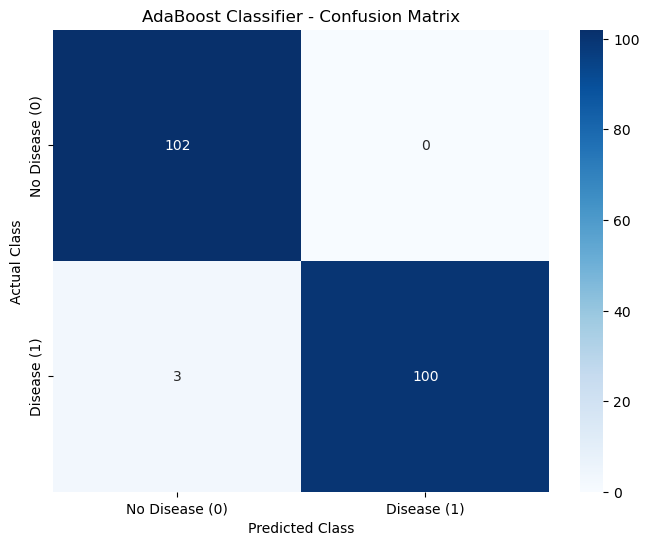

In [20]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

# Adaboost Classifier

clf = ensemble.AdaBoostClassifier(DecisionTreeClassifier(max_depth=maxdepth),n_estimators=numBaseClassifiers)
clf.fit(X_train_scaled, y_train)
Y_predTrain = clf.predict(X_train_scaled)
Y_predTest = clf.predict(X_test_scaled)
trainAcc.append(accuracy_score(y_train, Y_predTrain))
testAcc.append(accuracy_score(y_test, Y_predTest))

abc_accuracy = accuracy_score(y_test, Y_predTest)
abc_f1 = f1_score(y_test, Y_predTest, average="weighted")
abc_precision = precision_score(y_test, Y_predTest, average="weighted")
abc_recall = recall_score(y_test, Y_predTest, average="weighted")

print("AdaBoost Classifier Model Evaluation:")
print(f"Accuracy: {abc_accuracy:.4f}")
print(f"F1 Score: {abc_f1:.4f}")
print(f"Precision: {abc_precision:.4f}")
print(f"Recall: {abc_recall:.4f}\n")

from sklearn.metrics import confusion_matrix

cm_abc = confusion_matrix(y_test, Y_predTest)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_abc, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease (0)", "Disease (1)"], yticklabels=["No Disease (0)", "Disease (1)"])
plt.title("AdaBoost Classifier - Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

[Text(1.5, 0, 'Random Forest'),
 Text(2.5, 0, 'Bagging'),
 Text(3.5, 0, 'AdaBoost')]

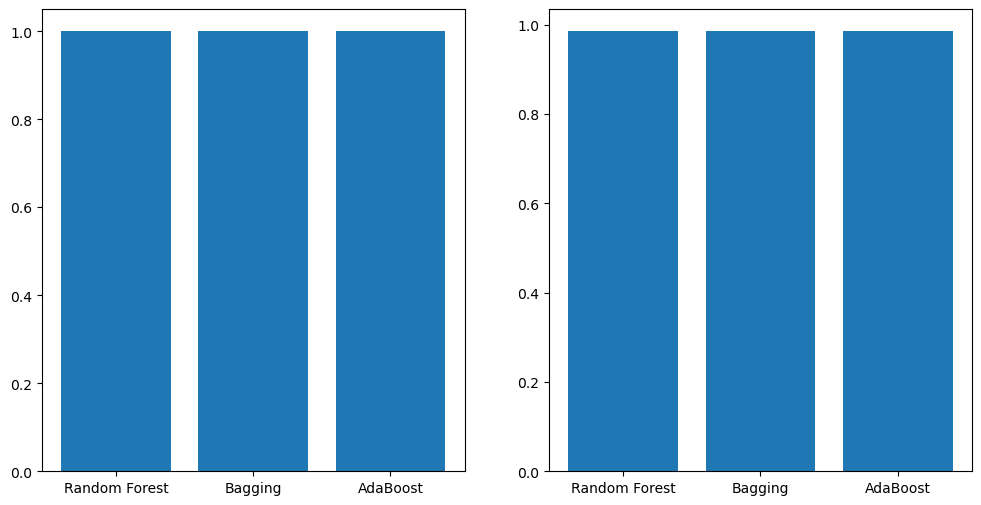

In [21]:
# Grafikler

methods = ['Random Forest', 'Bagging', 'AdaBoost']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.bar([1.5,2.5,3.5], trainAcc[:3])
ax1.set_xticks([1.5,2.5,3.5])
ax1.set_xticklabels(methods)

ax2.bar([1.5,2.5,3.5], testAcc[:3])
ax2.set_xticks([1.5,2.5,3.5])
ax2.set_xticklabels(methods)

### 3.4.5 Multilayer Perceptron (MLP)

Multilayer Perceptron (MLP), yapay sinir ağlarının bir türüdür ve doğrusal olmayan ilişkileri modelleyebilme kabiliyeti sayesinde sınıflandırma, regresyon gibi birçok problemde kullanılır.

MLP; giriş, gizli ve çıkış katmanlarından oluşur. Her nöron, önceki katmandaki tüm nöronlara bağlıdır. Aktivasyon fonksiyonları (ör. ReLU, sigmoid) ve geri yayılım algoritmasıyla ağırlıkları güncellenir.

MLP, esnek yapısıyla doğrusal olmayan verilerde etkili performans gösterir ve yeterli nöron ve katmanla herhangi bir fonksiyonu yaklaşık olarak öğrenebilir. Ancak, büyük veri setlerinde uzun eğitim süresi ve aşırı uyum (overfitting) riskleri taşır.

Görüntü işleme, doğal dil işleme, finans ve tıp gibi birçok alanda uygulanabilir ve modern derin öğrenme mimarilerinin temelini oluşturur.

In [22]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

# Multilayer Perceptron (MLP) modelini tanımlama ve eğitme
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp_model.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

Multilayer Perceptron (MLP) Model Evaluation:
Accuracy: 0.9854
Recall: 0.9709
Precision: 1.0000
F1 Score: 0.9852
Multilayer Perceptron (MLP)
Doğruluk: 0.9853658536585366
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



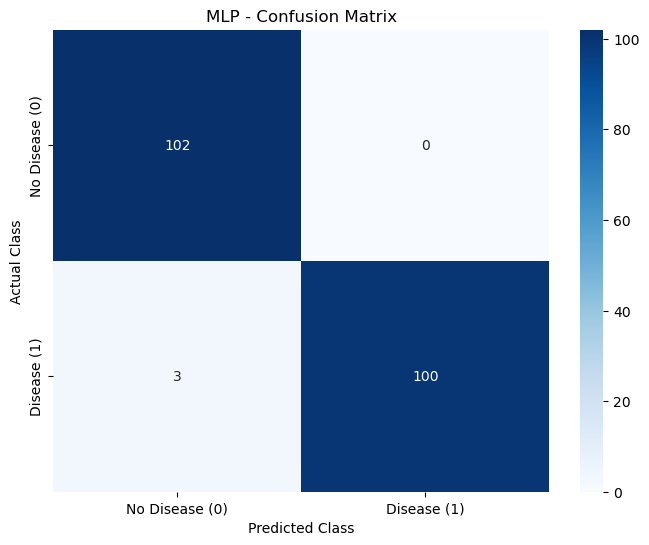

In [23]:
# Test seti üzerinde tahmin yapma
y_pred_mlp = mlp_model.predict(X_test_scaled)

# MLP modelini değerlendirme
mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
mlp_recall = recall_score(y_test, y_pred_mlp)
mlp_precision = precision_score(y_test, y_pred_mlp)
mlp_f1 = f1_score(y_test, y_pred_mlp)

print("Multilayer Perceptron (MLP) Model Evaluation:")
print(f"Accuracy: {mlp_accuracy:.4f}")
print(f"Recall: {mlp_recall:.4f}")
print(f"Precision: {mlp_precision:.4f}")
print(f"F1 Score: {mlp_f1:.4f}")

mlp_report = classification_report(y_test, y_pred_mlp)

print("Multilayer Perceptron (MLP)")
print(f"Doğruluk: {mlp_accuracy}")
print("Sınıflandırma Raporu:")
print(mlp_report)

cm_mlp = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_mlp, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease (0)", "Disease (1)"], yticklabels=["No Disease (0)", "Disease (1)"])
plt.title("MLP - Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

Farklı iterasyon sayıları için MLP modelinin eğitim ve test başarısındaki değişime bakalım:

C:\Users\DELL\anaconda3\envs\orange3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\DELL\anaconda3\envs\orange3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\DELL\anaconda3\envs\orange3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\DELL\anaconda3\envs\orange3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (4) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\DELL\anaconda3\envs\ora

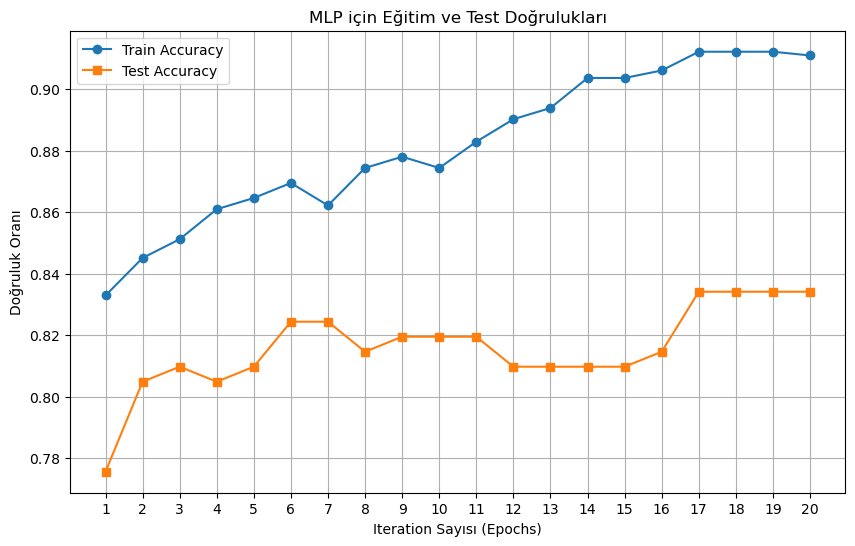

In [24]:
# MLP için eğitim ve test doğruluklarını takip etmek
train_accuracies_mlp = []
test_accuracies_mlp = []

# Farklı iterasyon sayıları için MLP doğruluklarını hesaplama
iterations = range(1, 21)
for max_iter in iterations:
    mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=max_iter, random_state=42)
    mlp_model.fit(X_train_scaled, y_train)

    # Eğitim ve test doğruluk oranlarını kaydetme
    train_accuracies_mlp.append(mlp_model.score(X_train_scaled, y_train))
    test_accuracies_mlp.append(mlp_model.score(X_test_scaled, y_test))

# Eğitim ve test doğruluklarını grafikleştirme
plt.figure(figsize=(10, 6))
plt.plot(iterations, train_accuracies_mlp, label="Train Accuracy", marker='o')
plt.plot(iterations, test_accuracies_mlp, label="Test Accuracy", marker='s')
plt.xticks(iterations)
plt.xlabel("Iteration Sayısı (Epochs)")
plt.ylabel("Doğruluk Oranı")
plt.title("MLP için Eğitim ve Test Doğrulukları")
plt.legend()
plt.grid(True)
plt.show()